In [1]:
X = [[2.0, 3.0, 5.0, 9.0],
     [1.5, 3.5, 4.5, 8.5],
     [2.5, 3.0, 1.0, 4.0]]

y_sparse = [2, 0, 1]
y_onehot = [[0, 0, 1], [1, 0, 0], [0, 1, 0]]

In [2]:
from src.layers import Dense, ReLU, Softmax
from src.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

dense1 = Dense(6, n_inputs=4)
activation1 = ReLU()
dense2 = Dense(3, n_inputs=6)
activation2 = Softmax()

loss_function1 = CategoricalCrossentropy()
loss_function2 = SparseCategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.outputs)
dense2.forward(activation1.outputs)
activation2.forward(dense2.outputs)

loss1 = loss_function1.calculate(y_onehot, activation2.outputs)
loss2 = loss_function2.calculate(y_sparse, activation2.outputs)


In [3]:
print("#### DENSE 1 ####\n")
dense1.info()

#### DENSE 1 ####

Inputs:
[[2.  3.  5.  9. ]
 [1.5 3.5 4.5 8.5]
 [2.5 3.  1.  4. ]]

Weights:
[[ 0.0884204   0.08087956  0.00031612 -0.01457281]
 [ 0.00408212  0.06566229  0.2303652   0.02931541]
 [ 0.05774887  0.09839803 -0.05028632  0.00491972]
 [-0.08485524 -0.03406533 -0.1016776   0.04616523]
 [ 0.24114111 -0.21317674 -0.05555996  0.15921861]
 [-0.07547067 -0.03780157 -0.15245626  0.10583737]]

Biases:
[0. 0. 0. 0. 0. 0.]

Outputs:
[[ 0.28990481  1.62081579  0.20353769 -0.3648074   0.99791969 -0.07409099]
 [ 0.29326273  1.52176557  0.24654557 -0.31165626  0.71893143 -0.031947  ]
 [ 0.40571457  0.55481901  0.40895881 -0.23135077  0.54463703 -0.03118814]]



In [4]:
print("#### ACTIVATION 1 ####\n")
activation1.info()

#### ACTIVATION 1 ####

Inputs:
[[ 0.28990481  1.62081579  0.20353769 -0.3648074   0.99791969 -0.07409099]
 [ 0.29326273  1.52176557  0.24654557 -0.31165626  0.71893143 -0.031947  ]
 [ 0.40571457  0.55481901  0.40895881 -0.23135077  0.54463703 -0.03118814]]

Outputs:
[[0.28990481 1.62081579 0.20353769 0.         0.99791969 0.        ]
 [0.29326273 1.52176557 0.24654557 0.         0.71893143 0.        ]
 [0.40571457 0.55481901 0.40895881 0.         0.54463703 0.        ]]



In [5]:
print("#### DENSE 2 ####\n")
dense2.info()

#### DENSE 2 ####

Inputs:
[[0.28990481 1.62081579 0.20353769 0.         0.99791969 0.        ]
 [0.29326273 1.52176557 0.24654557 0.         0.71893143 0.        ]
 [0.40571457 0.55481901 0.40895881 0.         0.54463703 0.        ]]

Weights:
[[-0.1843888   0.17351381  0.08353391  0.12269743  0.01865376 -0.31083961]
 [-0.08102901 -0.1667964   0.05472757  0.06415841  0.13262111 -0.03587741]
 [ 0.04112578 -0.06567278  0.00291809 -0.12947135  0.10452893 -0.20096005]]

Biases:
[0. 0. 0.]

Outputs:
[[ 0.26339598 -0.1503526   0.01038451]
 [ 0.24397867 -0.16874948 -0.01200933]
 [ 0.065781   -0.03080477  0.03837253]]



In [6]:
print("#### ACTIVATION 2 ####\n")
activation2.info()

#### ACTIVATION 2 ####

Inputs:
[[ 0.26339598 -0.1503526   0.01038451]
 [ 0.24397867 -0.16874948 -0.01200933]
 [ 0.065781   -0.03080477  0.03837253]]

Outputs:
[[0.13906106 0.09194261 0.10797521]
 [0.13638692 0.09026661 0.1055841 ]
 [0.11412544 0.10361814 0.11103991]]



In [7]:
print("#### LOSS ####\n")
print(loss1, loss2)

#### LOSS ####

2.161718652018869 2.161718652018869


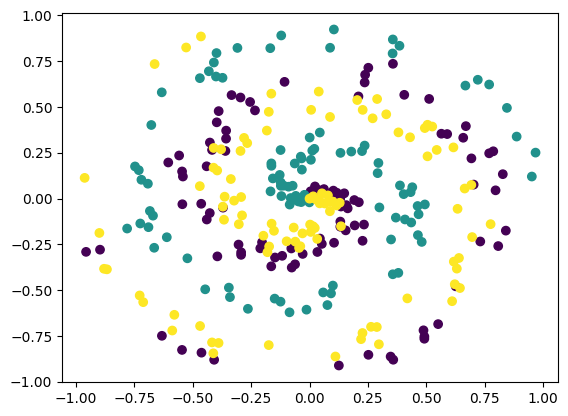

In [8]:
import matplotlib.pyplot as plt
from src.datasets import spiral_data

X, y = spiral_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)

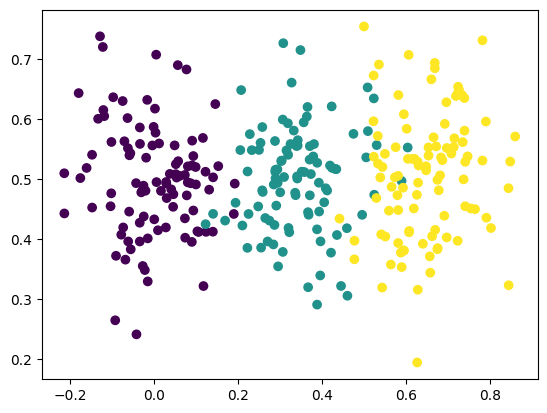

In [9]:
from src.datasets import vertical_data

X, y = vertical_data(n_samples=100, n_classes=3)

plt.scatter(X[:, 0], X[:, 1], c=y)